In [2]:
import pandas as pd
import numpy as np

In [10]:
%pip install matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.4 MB 6.2 MB/s            
     |████████████████████████████████| 294 kB 33.3 MB/s            
     |████████████████████████████████| 10.1 MB 14.7 MB/s            
     |████████████████████████████████| 104 kB 23.3 MB/s            
     |████████████████████████████████| 2.3 MB 16.4 MB/s            
     |████████████████████████████████| 247 kB 30.6 MB/s            
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     |████████████████████████████████| 65 kB 12.2 MB/s            
     |████████████████████████████████| 301 kB 15.2 MB/s            
     |████████████████████████████████| 35.0 MB 7.1 MB/s            
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [31]:
from collections import Counter


In [22]:
nbaPlayers = pd.read_csv('NBA_PLAYERS.csv')

Understanding the Data

In [23]:
print("\nFirst 5 Rows:")
print(nbaPlayers.head())


First 5 Rows:
                  Name  Debut  Final               Position  Height  Weight  \
0       Alaa Abdelnaby   1991   1995  ['Forward', 'Center']      82   240.0   
1      Zaid Abdul-Aziz   1969   1978  ['Center', 'Forward']      81   235.0   
2  Kareem Abdul-Jabbar   1970   1989             ['Center']      86   225.0   
3   Mahmoud Abdul-Rauf   1991   2001              ['Guard']      73   162.0   
4    Tariq Abdul-Wahad   1998   2003            ['Forward']      78   223.0   

           Birthday                           School    HOF  Active     G  \
0     June 24, 1968                         ['Duke']  False   False   256   
1     April 7, 1946                   ['Iowa State']  False   False   505   
2    April 16, 1947                         ['UCLA']   True   False  1560   
3     March 9, 1969                          ['LSU']  False   False   586   
4  November 3, 1974  ['Michigan', ' San Jose State']  False   False   236   

    PTS   TRB  AST   FG%  FG3%   FT%  eFG%   PE

In [24]:
print("\nSummary Statistics (Numerical Columns):")
print(nbaPlayers.describe())



Summary Statistics (Numerical Columns):
             Debut        Final       Height       Weight            G  \
count  5313.000000  5313.000000  5313.000000  5308.000000  5313.000000   
mean   1990.347638  1994.583474    78.028421   209.422193   270.112931   
std      23.304513    23.984924     3.584362    25.816046   310.623022   
min    1947.000000  1947.000000    63.000000   114.000000     1.000000   
25%    1971.000000  1975.000000    75.000000   190.000000    31.000000   
50%    1992.000000  1998.000000    78.000000   210.000000   127.000000   
75%    2012.000000  2017.000000    81.000000   225.000000   446.000000   
max    2025.000000  2025.000000    91.000000   360.000000  1611.000000   

               PTS          TRB          AST          FG%         FG3%  \
count  5313.000000  5021.000000  5313.000000  5278.000000  3656.000000   
mean      6.389441     3.009659     1.417674    40.986415    24.761187   
std       4.771323     2.276247     1.353916    10.792534    15.432604

In [25]:
print("\nSummary Statistics (Categorical Columns):")
print(nbaPlayers.describe(include=['object']))



Summary Statistics (Categorical Columns):
                  Name   Position          Birthday        School
count             5313       5313              5297          4917
unique            5266          7              4858           996
top     George Johnson  ['Guard']  October 25, 1948  ['Kentucky']
freq                 3       1920                 3           118


In [ ]:
hofPlayers = nbaPlayers[(nbaPlayers['HOF'] == True)]

                     Name  Debut  Final              Position  Height  Weight  \
2     Kareem Abdul-Jabbar   1970   1989            ['Center']      86   225.0   
27           Rick Adelman   1969   1975             ['Guard']      73   175.0   
70              Ray Allen   1997   2014             ['Guard']      77   205.0   
122       Carmelo Anthony   2004   2022           ['Forward']      79   238.0   
132        Tiny Archibald   1971   1984             ['Guard']      73   150.0   
...                   ...    ...    ...                   ...     ...     ...   
5071        Lenny Wilkens   1961   1975             ['Guard']      73   180.0   
5073        Jamaal Wilkes   1975   1986  ['Forward', 'Guard']      78   190.0   
5076    Dominique Wilkins   1983   1999  ['Forward', 'Guard']      80   215.0   
5246         James Worthy   1983   1994           ['Forward']      81   225.0   
5273       George Yardley   1954   1960  ['Forward', 'Guard']      77   190.0   

               Birthday    

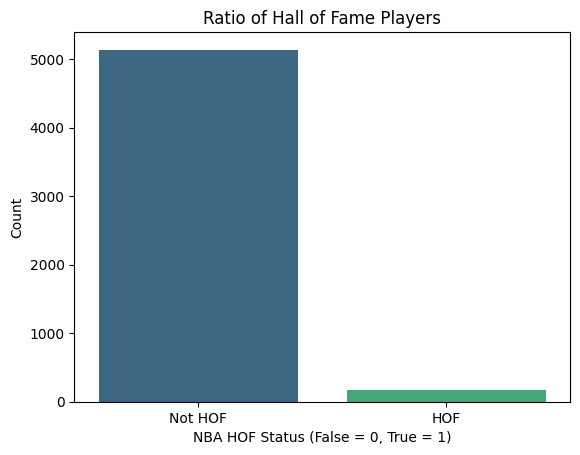

In [30]:
nbaPlayersCounts = nbaPlayers['HOF'].value_counts()

sns.barplot(x=nbaPlayersCounts.index, y=nbaPlayersCounts.values, palette='viridis')

plt.xlabel('NBA HOF Status (False = 0, True = 1)')
plt.ylabel('Count')
plt.title('Ratio of Hall of Fame Players')
plt.xticks(ticks=[0, 1], labels=['Not HOF', 'HOF']) 
plt.show()

Counter({"['Guard']": 1920, "['Forward']": 1532, "'Forward']": 658, "['Forward'": 656, "['Center']": 547, "'Center']": 434, "['Guard'": 420, "['Center'": 238, "'Guard']": 222})


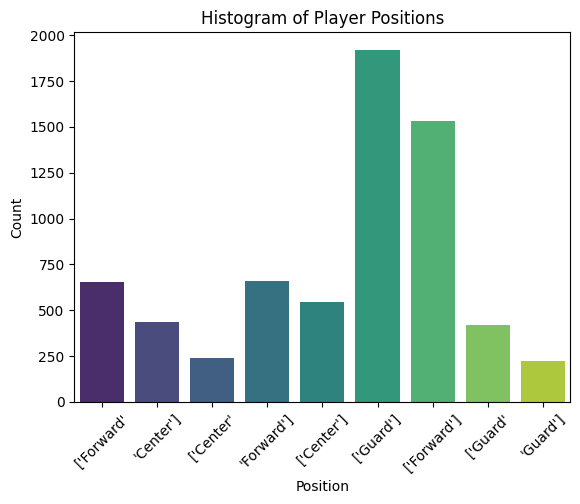

In [ ]:
all_positions = [pos.strip() for sublist in nbaPlayers['Position'] for pos in sublist.split(',')]

position_counts = Counter(all_positions)
print(position_counts)

positions_df = pd.DataFrame(position_counts.items(), columns=['Position', 'Count'])

sns.barplot(x='Position', y='Count', data=positions_df, palette='viridis')

plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Histogram of Player Positions')
plt.xticks(rotation=45)  
plt.show()

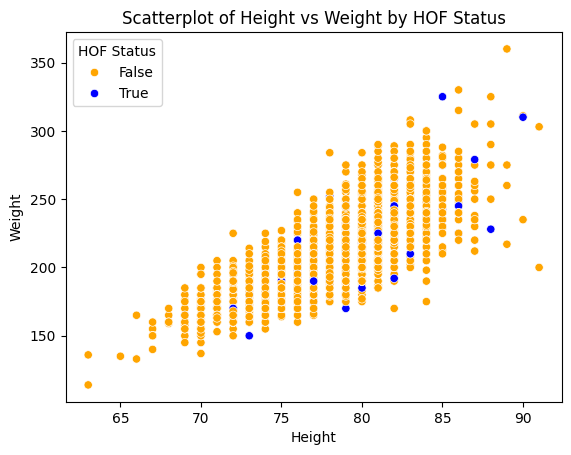

In [45]:
sns.scatterplot(data=nbaPlayers, x='Height', y='Weight', hue='HOF', palette={True: 'blue', False: 'orange'})

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatterplot of Height vs Weight by HOF Status')
plt.legend(title='HOF Status')
plt.show()

Data Processing


In [46]:
nbaCopy = nbaPlayers.copy()

In [48]:
cols = ['Weight', 'TRB', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS']
num_imputer = SimpleImputer(strategy='median')
nbaCopy[cols] = num_imputer.fit_transform(nbaCopy[cols])

In [50]:
cats = ['Birthday', 'School']
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
nbaCopy[cats] = cat_imputer.fit_transform(nbaCopy[cats])

In [51]:
nbaCopy['Total_Career_Points'] = nbaCopy['PTS'] * nbaCopy['G']
nbaCopy['Total_Career_Rebounds'] = nbaCopy['TRB'] * nbaCopy['G']
nbaCopy['Total_Career_Assists'] = nbaCopy['AST'] * nbaCopy['G']

In [52]:
nbaCopy['Career_Length'] = nbaCopy['Final'] - nbaCopy['Debut']
nbaCopy['Avg_Seasonal_Points'] = nbaCopy['Total_Career_Points'] / nbaCopy['Career_Length'].replace(0, 1)  
nbaCopy['Peak_Performance'] = nbaCopy[['PTS', 'TRB', 'AST', 'PER']].max(axis=1)  
nbaCopy['Efficiency_Per_Game'] = nbaCopy['PER'] / nbaCopy['G'].replace(0, 1) 